In [ ]:
!nvidia-smi

Fri Apr 30 07:26:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   1224MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#https://www.kaggle.com/errearanhas/simple-custom-cnn-for-cifar-10-classification
#https://www.kaggle.com/skydevour/cifar-10-for-beginner batchnormalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


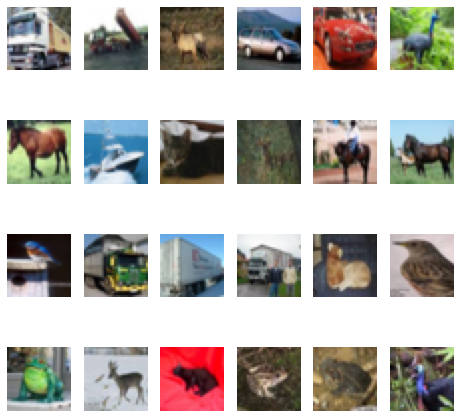

In [6]:
fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 4
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

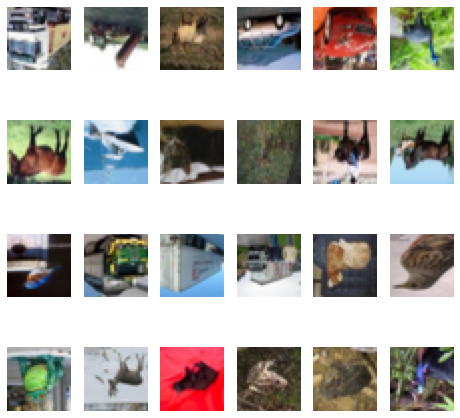

In [7]:
#vertical flip images
fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 4
for i in range(1, columns*rows +1):
    im = x_train[i]
    img = np.flipud(im)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [8]:
print(x_train.max())
print(x_test.max())

255
255


In [9]:
x_train = x_train/225
x_test = x_test/255
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)

In [10]:
#building model
model_layers = [
                Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='same',input_shape=(32, 32, 3), activation='relu',),
                BatchNormalization(),
                MaxPool2D(pool_size=(2, 2)),
                Dropout(rate =0.2),

                Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu',),
                BatchNormalization(),
                MaxPool2D(pool_size=(2, 2)),
                Dropout(rate =0.2),

                Flatten(),
                Dense(128, activation='relu'),
                Dropout(0.2),
                Dense(64, activation='relu'),
                Dropout(0.2),
                Dense(32, activation='relu'),
                Dropout(0.2),
                Dense(10, activation='softmax')
                
]
model = Sequential(model_layers)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        16416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.fit(np.flipud(x_train),
          y_cat_train,
          batch_size=256,
          epochs=100,
          validation_data=(x_test,y_cat_test))
#391/391: 391 is samples = 50,000/128 (batch size) = 390.6

Epoch 1/100
196/196 [==============================] - 33s 11ms/step - loss: 2.3983 - accuracy: 0.0999 - val_loss: 2.3639 - val_accuracy: 0.0806
Epoch 2/100
196/196 [==============================] - 2s 10ms/step - loss: 2.3044 - accuracy: 0.0994 - val_loss: 2.2990 - val_accuracy: 0.1000
Epoch 3/100
196/196 [==============================] - 2s 10ms/step - loss: 2.3031 - accuracy: 0.0951 - val_loss: 2.3026 - val_accuracy: 0.0962
Epoch 4/100
196/196 [==============================] - 2s 10ms/step - loss: 2.3031 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
196/196 [==============================] - 2s 10ms/step - loss: 2.3031 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
196/196 [==============================] - 2s 10ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
196/196 [==============================] - 2s 10ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy

In [14]:
losses = pd.DataFrame(model.history.history)

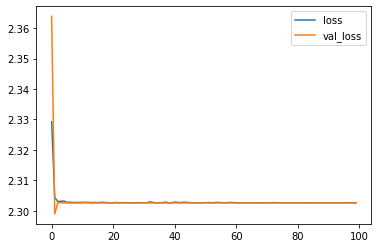

In [15]:
losses[['loss','val_loss']].plot()

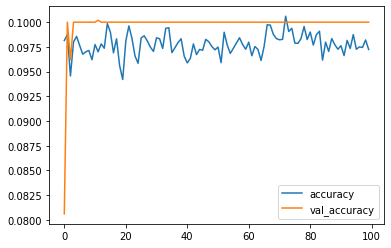

In [16]:
losses[['accuracy','val_accuracy']].plot()

In [17]:
#evaluate model
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[2.302586793899536, 0.10000000149011612]


In [18]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
confusion_matrix(y_test,predictions)

array([[   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0]])

In [21]:
#predict
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# https://www.cs.toronto.edu/~kriz/cifar.html

d = dict(zip(classes, class_names))

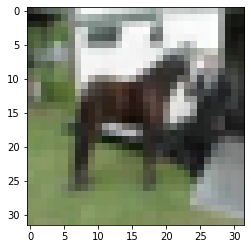

In [25]:
c = 20
my_image = x_test[c]

plt.imshow(my_image)

In [28]:
input_img = my_image.reshape(1,32,32,3)

predictions = np.argmax(model.predict(input_img), axis=-1)[0]

print(f"True class: {d[y_test[c][0]]} \n\nPredicted class: {d[predictions]}")

True class: horse 

Predicted class: dog
